<h1 style = "font-family: Fira Code; text-align:center; color:#CADCAE; font-weight: 800">PYTORCH FOR DEEPLEARNING</h1>
<img style = "display: block; margin: 0 auto; width:auto; height: 20em" src = "https://pytorch.org/wp-content/uploads/2025/05/PyTorch-Open-Language-of-AI-1024x536.png">

In [1]:
import torch
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
print(torch.__version__)

2.8.0+cu128


<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}
</style>

<div>
    <h1>1. Tensor Basics</h1>
    <p><b>PyTorch</b> is an open-source machine learning framework, primarily used for deep learning applications. It was developed by <b>Meta</b> and is known for its flexibility, Pythonic interface, and dynamic computational graph. </p>
    <h2>1.1 Basical PyTorch Functions</h2>
    <p>
        PyTorch provides a lot of functions used for manipulating numerical data. 
        <ul>
            <li><b>torch.empty():</b> Return a tensor filled with uninitialized data. However, this function takes the old data on RAM/VRAM and returns it.</li>
            <li><b>torch.ones(), torch.zeros():</b> Return a tensor filled with 1. or 0.</li>
            <li><b>torch.tensor():</b> Return a tensor filled with data from user.</li>
            <li><b>torch.rand():</b> Return a random tensor mathematically.</li>
            <li><b>torch.add(), torch.sub(), torch.div(), torch.mul():</b> Used to manipulate tensors with basical operations.</li>
            <li><b>torch.view():</b> Return a new tensor with the same data as the <b>self</b> tensor but of a different <b>shape.</b><li>
        </ul>
    </p>
</div>


In [2]:
x = torch.empty(size = (2, 3), dtype=torch.float16)
x

tensor([[-3.7231e-03, -8.7500e-01,         nan],
        [ 0.0000e+00, -1.4400e+02, -6.1963e-01]], dtype=torch.float16)

In [3]:
x = torch.ones(size = (2, 3))
x.dtype

torch.float32

In [4]:
x = torch.tensor([2.5, 0.1])
x

tensor([2.5000, 0.1000])

In [5]:
x = torch.rand(size = (4, 5))
x

tensor([[0.9344, 0.6407, 0.0253, 0.6223, 0.0296],
        [0.4717, 0.3679, 0.8167, 0.5744, 0.8105],
        [0.1087, 0.8875, 0.8730, 0.4151, 0.7742],
        [0.1331, 0.2755, 0.3147, 0.6724, 0.1743]])

In [6]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

In [7]:
print(x - y)
print(torch.sub(x, y))

tensor([[-0.6370,  0.3137],
        [-0.0555,  0.4494]])
tensor([[-0.6370,  0.3137],
        [-0.0555,  0.4494]])


In [8]:
print("\n-------------- Before using torch.view() --------------\n")
x = torch.rand(4, 4)
print(x)
print(x.size())

print("\n-------------- After using torch.view(16) --------------\n")
y = x.view(16)
print(y)
print(y.size())

print("\n-------------- After using torch.view(-1, 8) --------------\n")
y = x.view(-1, 8) 
# the size -1 is INFERRED from other dimensions. For example, (-1, 8) means the original size will be transformed from (4, 4) to (2, 8). Because of 
# each row has 8 elements. So that the tensor has 16 / 8 = 2 columns.
print(y)
print(y.size())

print("\n-------------- Another example --------------\n")
a = torch.randn(1, 2, 3, 4)
print(a)
print(a.size())

b = a.transpose(1, 2) #* It means that swapping 2nd and 3rd dimension.
print(b.size())
print(b)

c = a.view(1, 3, 2, 4)
print(c.size())
print(c)

print(torch.equal(b, c))


-------------- Before using torch.view() --------------

tensor([[0.1252, 0.3920, 0.0774, 0.8907],
        [0.0444, 0.6693, 0.9147, 0.7503],
        [0.9080, 0.4249, 0.3120, 0.9349],
        [0.0896, 0.0797, 0.2982, 0.5963]])
torch.Size([4, 4])

-------------- After using torch.view(16) --------------

tensor([0.1252, 0.3920, 0.0774, 0.8907, 0.0444, 0.6693, 0.9147, 0.7503, 0.9080,
        0.4249, 0.3120, 0.9349, 0.0896, 0.0797, 0.2982, 0.5963])
torch.Size([16])

-------------- After using torch.view(-1, 8) --------------

tensor([[0.1252, 0.3920, 0.0774, 0.8907, 0.0444, 0.6693, 0.9147, 0.7503],
        [0.9080, 0.4249, 0.3120, 0.9349, 0.0896, 0.0797, 0.2982, 0.5963]])
torch.Size([2, 8])

-------------- Another example --------------

tensor([[[[-0.0225,  0.6792,  0.2621, -1.2087],
          [ 0.4342, -1.8741,  1.2856, -0.1515],
          [ 0.0693, -0.1813, -0.2898,  0.8867]],

         [[-0.6881, -1.3766, -0.1526,  0.7251],
          [-0.0809, -1.1630, -0.4466,  0.7981],
          [-0

<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}
 
#list_heading {
    font-weight: 800;
}
</style>

<div>
    <h1>2. AutoGrad</h1>
    <p>
        <b>torch.autograd()</b> is PyTorch's automatic differentation engine that powers neural network training. Training a NN happens in <b>two steps:</b><br>
        <ul>
            <li><b>Forward Propagation:</b> In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.</li>
            <li><b>Backward Propagation:</b> In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the paremeters of the functions, and optimizing the parameters using gradient descent.</li>
        </ul>
        When we use functions that return tensor, we can use <b>requires_grad</b> to follow gradient of tensor for the Backward Propagation. Here is the list of available functions that are be able to use <b>requires_grad</b> as a parameter:
        <ol>
            <li>
                <p id = "list_heading">Functions that return random values.</p>
                <ul>
                    <li>torch.rand<b>(size, requires_grad=True)</b></li>
                    <li>torch.randn<b>(size, requires_grad=True)</b></li>
                    <li>torch.randint<b>(low, high, size, requires_grad=True)</b></li>
                    <li>torch.rand_like<b>(other, requires_grad=True)</b></li>
                    <li>torch.randn_like<b>(other, requires_grad=True)</b></li>
                </ul>
            </li>
            <li>
                <p id = "list_heading">Functions that return specific values.</p>
                <ul>
                    <li>torch.zeros<b>(size, requires_grad=True)</b></li>
                    <li>torch.ones<b>(size, requires_grad=True)</b></li>
                    <li>torch.full<b>(size, fill_value, requires_grad=True)</b></li>
                    <li>torch.empty<b>(size, requires_grad=True)</b></li>
                    <li>torch.arange<b>(start, end, step, requires_grad=True)</b></li>
                    <li>torch.linspace<b>(start, end, steps, requires_grad=True)</b></li>
                </ul>
            </li>
        </ol>
    </p>
</div>


In [9]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()
    print(model_output)

    model_output.backward() # dx/dy

    print(weights.grad)

tensor(12., grad_fn=<SumBackward0>)
tensor([3., 3., 3., 3.])
tensor(12., grad_fn=<SumBackward0>)
tensor([6., 6., 6., 6.])
tensor(12., grad_fn=<SumBackward0>)
tensor([9., 9., 9., 9.])
tensor(12., grad_fn=<SumBackward0>)
tensor([12., 12., 12., 12.])
tensor(12., grad_fn=<SumBackward0>)
tensor([15., 15., 15., 15.])


<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.formula {
    font-size: 16px;
    text-align: center;
    margin: 10px 0;
    padding: 10px;
    background-color: #2d2d2d;
    border-radius: 5px;
}

.fraction {
    display: inline-block;
    text-align: center;
    vertical-align: middle;
}

.numerator {
    border-bottom: 1px solid #CADCAE;
    padding-bottom: 2px;
}

.denominator {
    padding-top: 2px;
}

.sum-notation {
    display: inline-block;
    position: relative;
    font-size: 1.2em;
    margin: 0 5px;
    vertical-align: middle;
}

.sum-top {
    position: absolute;
    top: -15px;
    left: 50%;
    transform: translateX(-50%);
    font-size: 0.7em;
}

.sum-bottom {
    position: absolute;
    bottom: -15px;
    left: 50%;
    transform: translateX(-50%);
    font-size: 0.7em;
}
</style>

<div>
    <h1>3. Gradient Descent</h1>
    <p>
        <b>Gradient Descent</b> is a general-purpose optimization algorithm used in machine learning and deep learning to find the minimum value of a function, often <b>a cost or loss function.</b> In AI field, there are a lot of loss functions used to optimize the loss value of a model such as:
        <ul>
            <li>
                <b>Mean Squared Error (MSE) / L2 Loss:</b> Calculates the average of the squared differences between predicted and actual values.<br>
                <div class="formula">
                    MSE = 
                    <span class="fraction">
                        <div class="numerator">1</div>
                        <div class="denominator">N</div>
                    </span>
                    <span class="sum-notation">
                        <span class="sum-top">N</span>
                        ∑
                        <span class="sum-bottom">i=1</span>
                    </span>
                    (ŷ<sub>i</sub> - y<sub>i</sub>)<sup>2</sup>
                </div>
            </li>
            <li>
                <b>Cross Entropy Loss:</b> Used for classification problems.<br>
                <div class="formula">
                    CE = -<span class="sum-notation">
                        <span class="sum-top">N</span>
                        ∑
                        <span class="sum-bottom">i=1</span>
                    </span> y<sub>i</sub> log(ŷ<sub>i</sub>)
                </div>
            </li>
            <li>
                <b>Gradient Descent Update:</b> Parameter update rule.<br>
                <div class="formula">
                    w<sub>new</sub> = w<sub>old</sub> - α 
                    <span class="fraction">
                        <div class="numerator">∂L</div>
                        <div class="denominator">∂w</div>
                    </span>
                </div>
            </li>
        </ul>
    </p>
</div>

In [10]:
X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0 # initialize

def forward(x):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean() 

def gradient(x, y, y_predicted):
    return np.dot(2 * x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#---------------------------- Learn -----------------------------
learning_rate = 0.01
epochs = 20

for epoch in range(epochs):
    y_pred = forward(X)

    l = loss(Y, y_pred)

    dw = gradient(X, Y, y_pred)

    w = w - dw * learning_rate

    if epoch % 5 == 0:
        print(f'Epoch {epoch}: w = {w}, loss = {l}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
Epoch 0: w = 1.1999999284744263, loss = 30.0
Epoch 5: w = 1.9918079376220703, loss = 0.0031457357108592987
Epoch 10: w = 1.9999160766601562, loss = 3.297340072094812e-07
Epoch 15: w = 1.9999991655349731, loss = 3.531397396727698e-11
Prediction after training: f(5) = 10.000


In [11]:
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # initialize

def forward(x):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean() 

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#---------------------------- Learn -----------------------------
learning_rate = 0.01
epochs = 100

for epoch in range(epochs):
    y_pred = forward(X)

    l = loss(Y, y_pred)

    l.backward() # dl/dw

    with torch.no_grad():
        w -= w.grad * learning_rate

    w.grad.zero_()

    if epoch % 5 == 0:
        print(f'Epoch {epoch}: w = {w}, loss = {l}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
Epoch 0: w = 0.29999998211860657, loss = 30.0
Epoch 5: w = 1.2457009553909302, loss = 5.9062323570251465
Epoch 10: w = 1.6653136014938354, loss = 1.1627856492996216
Epoch 15: w = 1.8514978885650635, loss = 0.22892260551452637
Epoch 20: w = 1.934108853340149, loss = 0.0450688973069191
Epoch 25: w = 1.9707638025283813, loss = 0.008872910402715206
Epoch 30: w = 1.987027645111084, loss = 0.0017468547448515892
Epoch 35: w = 1.99424409866333, loss = 0.00034391897497698665
Epoch 40: w = 1.9974461793899536, loss = 6.770494655938819e-05
Epoch 45: w = 1.9988667964935303, loss = 1.3328777640708722e-05
Epoch 50: w = 1.9994971752166748, loss = 2.6243997126584873e-06
Epoch 55: w = 1.999776840209961, loss = 5.168862458049261e-07
Epoch 60: w = 1.9999010562896729, loss = 1.0175587306093803e-07
Epoch 65: w = 1.9999560117721558, loss = 2.0093764874218323e-08
Epoch 70: w = 1.9999804496765137, loss = 3.9741685498029256e-09
Epoch 75: w = 1.9999914169311523, loss = 7.

<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}
</style>

<div>
    <h2>Practical Example with Linear Regression</h2>
    <p>
        Let's see how these concepts are applied in practice using PyTorch. We'll use tensors, perform basic operations, compute gradients, and update parameters using gradient descent to fit a simple linear model.
    </p>
</div>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import torch

from matplotlib.animation import FuncAnimation

In [13]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

print(data.head())
print(data.isnull().sum())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
x    0
y    1
dtype: int64


In [14]:
print(f'{data.describe()} \t {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618 	 None


In [15]:
data.y

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 700, dtype: float64

In [16]:
data = data.dropna()

train_input = torch.tensor(data['x'][0:500].values, dtype=torch.float32).reshape(-1, 1)
train_output = torch.tensor(data['y'][0:500].values, dtype=torch.float32).reshape(-1, 1)

test_input = torch.tensor(data['x'][500::].values, dtype=torch.float32).reshape(-1, 1)
test_output = torch.tensor(data['y'][500::].values, dtype=torch.float32).reshape(-1, 1)

print(train_input.shape)

torch.Size([500, 1])


In [17]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    
    # y = w * x + b
    def forward_propagation(self, train_input):
        w = self.parameters['w']
        b = self.parameters['b']

        predictions = train_input @ w + b

        return predictions

    def loss_function(self, predictions, train_output):
        loss = ((predictions - train_output) ** 2).mean()

        return loss
    
    def backward_propagation(self, train_input, train_output, predictions, learning_rate):
        l = self.loss_function(predictions, train_output)

        l.backward()

        with torch.no_grad():
            self.parameters['w'] -= learning_rate * self.parameters['w'].grad
            self.parameters['b'] -= learning_rate * self.parameters['b'].grad

        if self.parameters['w'].grad is not None:
            self.parameters['w'].grad.zero_()
            self.parameters['b'].grad.zero_()

    def train(self, train_input, train_output, learning_rate, epochs):
        if train_input.is_cuda:
            train_input = train_input.cpu()
        if train_output.is_cuda:
            train_output = train_output.cpu()

        self.parameters['w'] = torch.randn(train_input.shape[1], 1, requires_grad=True, dtype=torch.float32)
        self.parameters['b'] = torch.zeros(1, requires_grad=True, dtype=torch.float32)

        self.loss = []

        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward_propagation(train_input)
            l = self.loss_function(predictions, train_output)
            
            # Backward pass
            self.backward_propagation(train_input, train_output, predictions, learning_rate)
            
            self.loss.append(l.item())
            
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch + 1}, Loss: {l.item():.6f}")

        try:
            x_numpy = train_input.detach().numpy()
            y_numpy = train_output.detach().numpy()
            
            x_range = np.linspace(x_numpy.min(), x_numpy.max(), 100).reshape(-1, 1)
            
            with torch.no_grad():
                x_range_tensor = torch.from_numpy(x_range).float()
                y_pred = self.forward_propagation(x_range_tensor)
                y_pred_numpy = y_pred.numpy()
            plt.figure(figsize=(10, 6))
            plt.scatter(x_numpy, y_numpy, color='blue', label='Train Data')
            plt.plot(x_range, y_pred_numpy, color='red', linewidth=2, label='Linear Regression')
            plt.xlabel('Input')
            plt.ylabel('Output')
            plt.title('Linear Regression')
            plt.legend()
            plt.show()
            
            plt.figure(figsize=(10, 6))
            plt.plot(range(1, epochs + 1), self.loss)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Loss')
            plt.show()
        except Exception as e:
            print(f"Loss: {e}")
        
        return self.parameters, self.loss

Epoch 5, Loss: 1104.068359
Epoch 10, Loss: 565.911926
Epoch 15, Loss: 291.944366
Epoch 20, Loss: 152.471512
Epoch 25, Loss: 81.467918
Epoch 30, Loss: 45.321011
Epoch 35, Loss: 26.919136
Epoch 40, Loss: 17.551020
Epoch 45, Loss: 12.781854
Epoch 50, Loss: 10.353930
Epoch 55, Loss: 9.117910
Epoch 60, Loss: 8.488676
Epoch 65, Loss: 8.168336
Epoch 70, Loss: 8.005257
Epoch 75, Loss: 7.922236
Epoch 80, Loss: 7.879973
Epoch 85, Loss: 7.858454
Epoch 90, Loss: 7.847499
Epoch 95, Loss: 7.841922
Epoch 100, Loss: 7.839084
Epoch 105, Loss: 7.837639
Epoch 110, Loss: 7.836902
Epoch 115, Loss: 7.836525
Epoch 120, Loss: 7.836334
Epoch 125, Loss: 7.836236
Epoch 130, Loss: 7.836187
Epoch 135, Loss: 7.836161
Epoch 140, Loss: 7.836148
Epoch 145, Loss: 7.836140
Epoch 150, Loss: 7.836136
Epoch 155, Loss: 7.836134
Epoch 160, Loss: 7.836131
Epoch 165, Loss: 7.836131
Epoch 170, Loss: 7.836130
Epoch 175, Loss: 7.836128
Epoch 180, Loss: 7.836128
Epoch 185, Loss: 7.836126
Epoch 190, Loss: 7.836126
Epoch 195, Loss: 

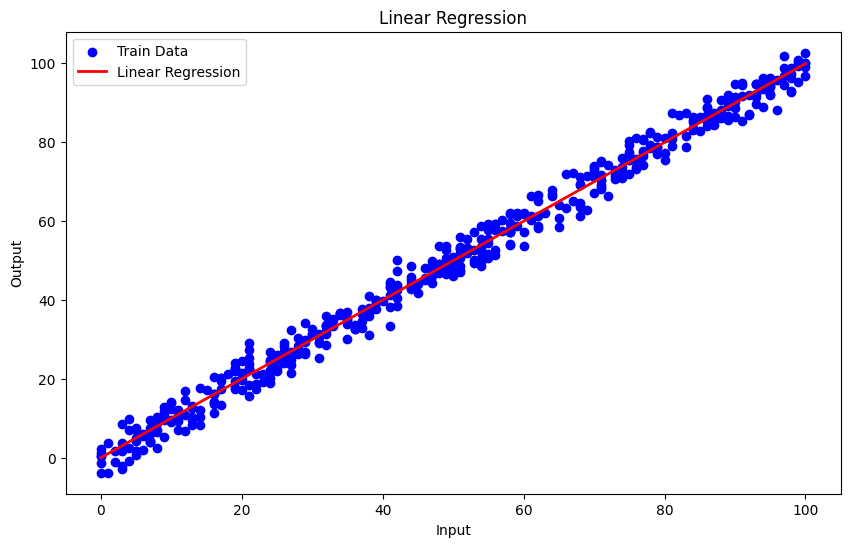

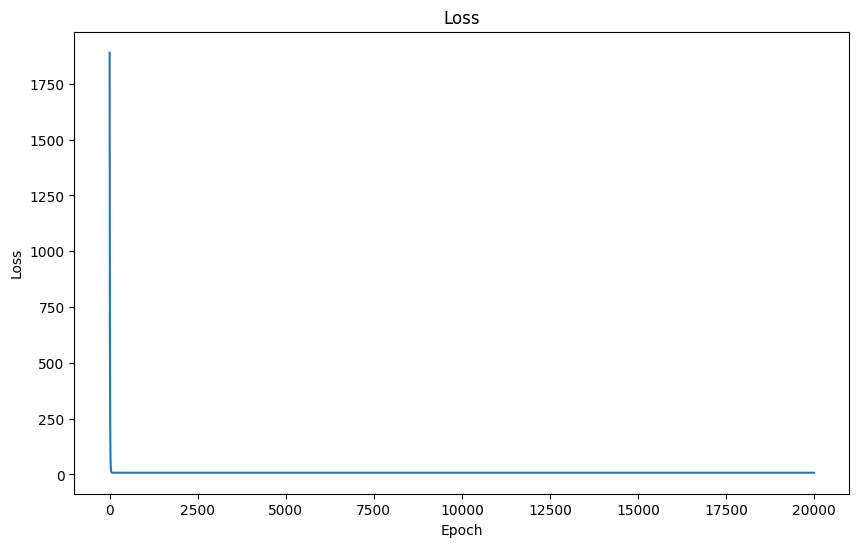

In [18]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.00001, 20000)

In [19]:
parameters

{'w': tensor([[0.9976]], requires_grad=True),
 'b': tensor([-0.0122], requires_grad=True)}

<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}
p {
    margin-bottom: 1em;
}
.formula-box {
    background-color: #222;
    border-left: 4px solid #CADCAE;
    border-radius: 6px;
    color: #E4E4E4;
    display: flex;
    align-items: center;
    justify-content: center;
    font-size: 18px;
    margin: 20px auto;
    padding: 15px 25px;
    max-width: 500px;
}

.math-symbol {
    color: #CADCAE;
    font-family: "Times New Roman", serif;
    font-style: italic;
    font-size: 22px;
    margin-right: 5px;
}

.fraction {
    display: inline-block;
    position: relative;
    vertical-align: middle;
    text-align: center;
    margin: 0 8px;
}

.fraction-numerator {
    padding: 0 5px 3px 5px;
}

.fraction-line {
    border-bottom: 1.5px solid #CADCAE;
    width: 100%;  /* Changed from 25% to 100% */
    margin: 0 auto;  /* Center the line */
    display: block;  /* Ensure it takes up full width */
}

.fraction-denominator {
    padding: 3px 5px 0 5px;
}
</style>

<div>
    <h1>Logistic Regression</h1>
    <p>
        Logistic Regression is a fundamental classification algorithm in machine learning. Unlike linear regression, which predicts continuous values, logistic regression is used to predict the probability that a given input belongs to a particular class (often binary classification: 0 or 1).
    </p>
    <p>
    The core idea is to model the probability that an input <b>x</b> belongs to the positive class using the logistic (sigmoid) function:
    </p>
    <div class="formula-box">
        <span class="math-symbol">σ(z)</span> = 
        <div class="fraction">
            <div class="fraction-numerator">1</div>
            <div class="fraction-line"></div>
            <div class="fraction-denominator">1 + e<sup>-z</sup></div>
        </div>
    </div>
    <p>
    <p>
        The output of the sigmoid function is always between 0 and 1, making it suitable for probability estimation. Logistic regression is widely used for tasks such as spam detection, medical diagnosis, and many other binary classification problems.
    </p>
</div>

In [20]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

In [22]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

n_samples, n_features = X.shape

X shape: (569, 30)
y shape: (569,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11082006)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [24]:
y_train.shape

torch.Size([455])

In [25]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


<style>
.formula-inline {
  display: inline-block;
  background: linear-gradient(180deg, rgba(202,220,174,.08), rgba(202,220,174,.02));
  border: 1px solid #354040;
  border-radius: 6px;
  padding: 4px 10px;
  margin-left: 6px;
  vertical-align: middle;
}

.formula-inline .math {
  font-family: "Times New Roman", serif;
  font-style: italic;
  color: #E8EAE3;
  font-size: 1em;
}

.formula-inline sup {
  font-size: 0.7em;
}

*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
    font-weight: 550;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.formula-box {
    background-color: #222;
    border-left: 4px solid #CADCAE;
    border-radius: 6px;
    color: #E4E4E4;
    display: flex;
    align-items: center;
    justify-content: center;
    font-size: 18px;
    margin: 20px auto;
    padding: 15px 25px;
    max-width: 600px;
}

.math-symbol {
    color: #CADCAE;
    font-family: "Times New Roman", serif;
    font-style: italic;
    font-size: 22px;
    margin-right: 5px;
}

.sum-notation {
    display: inline-block;
    position: relative;
    font-size: 1.2em;
    margin: 0 5px;
    vertical-align: middle;
}

.sum-top {
    position: absolute;
    top: -15px;
    left: 50%;
    transform: translateX(-50%);
    font-size: 0.7em;
}

.sum-bottom {
    position: absolute;
    bottom: -15px;
    left: 50%;
    transform: translateX(-50%);
    font-size: 0.7em;
}
.para{
    color: #DA6C6C;
    font-weight: 1000;
}
</style>

<div>
    <h1>Log Loss Function</h1>
    <p>The <b>Log Loss equation</b> returns the logarithm of the magnitude of the change, rather than just the distance from data to prediction.</p>
    <div class="formula-box">
        <span class="math-symbol">L</span> = -
        <span class="sum-notation">
            <span class="sum-top">N</span>
            ∑
            <span class="sum-bottom">i=1</span>
        </span>
        [y<sub>i</sub> log(ŷ<sub>i</sub>) + (1 - y<sub>i</sub>) log(1 - ŷ<sub>i</sub>)]
    </div>
    <h1>Regularization</h1>
    <p><b>Regularization</b> is a technique used to prevent over-fitting, which occurs when a model learns the training data too well. It adds a penalty term to the model's loss function. This penalty discourages overly complex models, forcing the model to find a balance between fitting the training data and being simple enough to generalize well.</p>
    <h1>Building Logistics Model with Pytorch</h1>
    <p><b>Logistic regression</b> is an extremely efficient mechanism for calculating probabilities. Logistic models have the following characteristics:</p>
    <ol>
        <li>The label is <b>categorical</b>. The term logistic regression usually refers to <b>binary logistic regression</b>, that is, to a model that calculates probabilities for labels with two possible values.</li>
        <li>The loss function during training is <b>Log Loss</b></li>
        <li>The model has a linear architecture, not a deep neural network.</li>
    </ol>
    <h2>Some functions in PyTorch.nn</h2>
    <ol>
        <li>
            <b>nn.Linear(<span class = "para">in_features, out_features, bias=True</span>)</b>: is a layer that applies a linear transformation to the incoming data:
            <span class="formula-inline"><span class="math">y = xW<sup>T</sup> + b</span></span>
        </li>
        <li>
            <b>nn.BCELoss()</b><em>, Binary Cross-Entropy Loss, </em> computes the loss for <b>binary</b> or <b>multi-label</b> tasks when your model outputs <b>probabilities</b> in <em>0, 1</em> after a Sigmoid.
        </li>
    </ol>
</div>


In [26]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegressionModel, self).__init__()

        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        predictions = torch.sigmoid(self.linear(x))
        return predictions

model = LogisticRegressionModel(n_features)
model

LogisticRegressionModel(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

In [27]:
learning_rate = 0.01
epochs = 200

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch + 1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()

    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])

    print(f'Accuracy = {acc:.4f}')

Epoch: 5, loss = 0.5688
Epoch: 10, loss = 0.5126
Epoch: 15, loss = 0.4691
Epoch: 20, loss = 0.4346
Epoch: 25, loss = 0.4066
Epoch: 30, loss = 0.3833
Epoch: 35, loss = 0.3636
Epoch: 40, loss = 0.3467
Epoch: 45, loss = 0.3320
Epoch: 50, loss = 0.3192
Epoch: 55, loss = 0.3078
Epoch: 60, loss = 0.2976
Epoch: 65, loss = 0.2884
Epoch: 70, loss = 0.2801
Epoch: 75, loss = 0.2726
Epoch: 80, loss = 0.2656
Epoch: 85, loss = 0.2592
Epoch: 90, loss = 0.2534
Epoch: 95, loss = 0.2479
Epoch: 100, loss = 0.2428
Epoch: 105, loss = 0.2380
Epoch: 110, loss = 0.2335
Epoch: 115, loss = 0.2293
Epoch: 120, loss = 0.2254
Epoch: 125, loss = 0.2217
Epoch: 130, loss = 0.2181
Epoch: 135, loss = 0.2148
Epoch: 140, loss = 0.2116
Epoch: 145, loss = 0.2086
Epoch: 150, loss = 0.2057
Epoch: 155, loss = 0.2029
Epoch: 160, loss = 0.2003
Epoch: 165, loss = 0.1977
Epoch: 170, loss = 0.1953
Epoch: 175, loss = 0.1930
Epoch: 180, loss = 0.1908
Epoch: 185, loss = 0.1886
Epoch: 190, loss = 0.1865
Epoch: 195, loss = 0.1845
Epoch:

In [28]:
model.parameters()

<generator object Module.parameters at 0x7fc75422fa00>

<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
    font-weight: 550;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.para{
    color: #DA6C6C;
    font-weight: 950;
}

.name_list {
    font-weight: 950;
}

.math{ font-family: "Times New Roman", serif; font-style: italic; color:#E8EAE3; }
.op{ font-style: normal; padding:0 4px; color:#CADCAE; }
sup{ font-size:.7em; vertical-align:.2em; }
sub{ font-size:.7em; vertical-align:-.2em; }
.frac{ display:inline-grid; grid-template-rows:auto auto; align-items:center; margin:0 4px; }
.frac .num, .frac .den{ text-align:center; padding:0 .2em; }
.frac .bar{ height:1px; background: currentColor; opacity:.7; margin:2px 0; }
</style>

<div>
    <h1>Feedforward Neural Network</h1>
    <p><b class = "para">Feedforward Neural Network (FNN)</b> is a type of artificial neural network in which information flows in a single direction i.e from the input layer through hidden layers to the output layer without loops or feedback. It is mainly used for pattern recognition tasks like image and speech classification.</p>
    <h2>Structure of a Feedforward Neural Network</h2>
    <p><b class = "name_list">Feedforward Neural Network</b> have a structured layered design where data flows sequentially through each layer.</p>
    <ol>
        <li><b class = "name_list">Input Layer:</b> The input layer consists of neurons that receive the input data. Each neuron in the input layer represents a feature of the input data.</li>
        <li><b class = "name_list">Hidden Layers:</b> One or more hidden layers are placed between the input and output layers. These layers are responsible for learning the complex patterns in the data.</li>
        <li><b class = "name_list">Output Layer:</b> The output layer provides the final output of the network. THe number of neurons in this layer corresponds to the number of classes in a classification problem or the number of outputs in a regression problem.</li>
    </ol>
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20240601001059/FNN.jpg" style = "display: block; margin: 0 auto;">
    <h2>Activation Functions</h2>
    <p><b class = "para">Activation functions</b> introduce non-linearity into the network enabling it to learn and model complex data patterns. Common activation functions include:</p>
    <ol>
        <li>
            <b class="name_list">Sigmoid:</b>
            <span class="math">
            σ(x) <span class="op">=</span>
            <span class="frac">
                <span class="num">1</span>
                <span class="bar"></span>
                <span class="den">1 + e<sup>−x</sup></span>
            </span>
            </span>
        </li>
        <li>
            <b class="name_list">Tanh:</b>
            <span class="math">
            tanh(x) <span class="op">=</span>
            <span class="frac">
                <span class="num">e<sup>x</sup> − e<sup>−x</sup></span>
                <span class="bar"></span>
                <span class="den">e<sup>x</sup> + e<sup>−x</sup></span>
            </span>
            </span>
        </li>
        <li>
            <b class="name_list">ReLU:</b>
            <span class="math">ReLU(x) <span class="op">=</span> max(0, x)</span>
        </li>
    </ol>

</div>


<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
    font-weight: 550;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.para{
    color: #DA6C6C;
    font-weight: 950;
}

.name_list {
    font-weight: 950;
}
</style>
<div>
    <h1>Practice Feedforward Neural Network with MNIST Data</h1>
    <h2>Overview of MNIST Data</h2>
    <p>The <b>MNIST</b> dataset, short for Modified National Institute of Standards and Technology Database, is a widely recognized and utilized dataset in the field of machine learning and image processing. It consists of a large collection of gray-scale images of handwritten digits from 0 to 9.</p>
    <p>Key characteristics of the MNIST Dataset include:</p>
    <ul>
        <li><b class = "name_list">Content:</b> It comprises 70,000 images in total, with 60,000 designated for training and 10,000 for testing.</li>
        <li><b class = "name_list">Image Format:</b>Each image is a 28x28 pixel gray-scale representation of a handwritten digit.</li>
    </ul>
</div>

In [29]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Your device is {device}')

Your device is cpu


<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
    font-weight: 550;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.para{
    color: #DA6C6C;
    font-weight: 950;
}

.name_list {
    font-weight: 950;
}
</style>
<div>
    <h1>Define hyperparameters</h1>
    <p>In machine learning, a hyperparameters is a configuration variable that is set before the learning process begins, controlling how the model learns from data. Here are some common hyperparameters:</p>
    <ol>
        <li><b class = "name_list">Learning Rate:</b> Used to control the step size during weight updates.</li>
        <li><b class = "name_list">Number of Layers/Neurons:</b> Defines the architecture of a neural network.</li>
        <li><b class = "name_list">Batch Size:</b> Determines the number of training examples used in each iteration.</li>
        <li><b class = "name_list">Regularization Parameters:</b> Control model complexity and prevent overfitting.</li>
        <li><b class = "name_list">Optimizer Choice:</b> Selects the algorithm used for updating model parameters.</li>
    </ol>
</div>

In [30]:
input_size = 784 # 28x28 image resolution 
hidden_size = 100 #* be able to change
num_classes = 10
epochs = 2
batch_size = 100
learning_rate = 0.001

In [31]:
root_dir = '/home/phuckhang/Downloads/data_mnist'

training_dataset = torchvision.datasets.MNIST(root='/home/phuckhang/Downloads/data_mnist', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='/home/phuckhang/Downloads/data_mnist', train=False, transform=transforms.ToTensor())

In [32]:
train_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)

print("[num_samples, color_channel, width, height]")
print(samples.shape, labels.shape)

[num_samples, color_channel, width, height]
torch.Size([100, 1, 28, 28]) torch.Size([100])


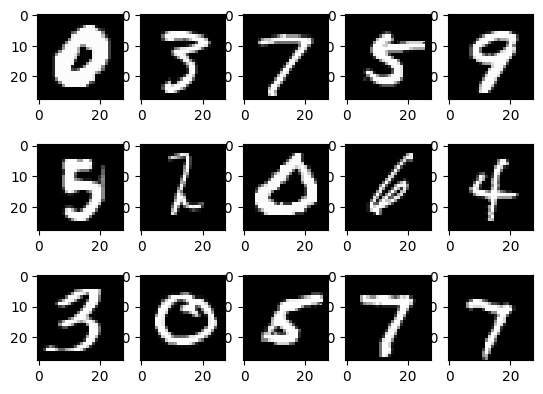

In [33]:
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [34]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()

        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out
model = NeuralNetwork(input_size, hidden_size, num_classes)
model

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        output = model(imgs)

        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f'Epoch: {epoch + 1}/{epochs}, step {i + 1}/{n_total_steps}, loss = {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        output = model(images)

        _, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy = {acc}')

Accuracy = 95.33


<style>
*{
    color: #D6DAC8;
    font-family: "Fira Code";
    font-size: 14px;
    font-weight: 550;
}

h1, h2, h3, h4, h5, h6 {
    color: #CADCAE;
    font-weight: 800;
}

.para{
    color: #DA6C6C;
    font-weight: 950;
}

.name_list {
    font-weight: 950;
}

.math{ font-family: "Times New Roman", serif; font-style: italic; color:#E8EAE3; }
.op{ font-style: normal; padding:0 4px; color:#CADCAE; }
sup{ font-size:.7em; vertical-align:.2em; }
sub{ font-size:.7em; vertical-align:-.2em; }
.frac{ display:inline-grid; grid-template-rows:auto auto; align-items:center; margin:0 4px; }
.frac .num, .frac .den{ text-align:center; padding:0 .2em; }
.frac .bar{ height:1px; background: currentColor; opacity:.7; margin:2px 0; }
</style>

<div>
    <h1>Convolutional Neural Networks</h1>
    <p>
        <b class = "para">Convolutional Neural Networks (CNNs)</b> are deep learning models designed to process data with a <b>grid-like</b> topology such as images. They are the foundation for most modern computer vision applications to detect features within visual data.
        <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250529121802516451/Convolutional-Neural-Network-in-Machine-Learning.webp" style="display:block; margin: 0 auto;">
    </p>
    <h2>Key Components of a Convolutional Neural Network</h2>
    <p>
        <ol>
            <li><b class="name_list">Convolutional Layers</b>: These layers apply convolutional operations to input images using <b>filters or kernels</b> to detect features such as edges, textures and more complex patterns. Convolutional operations help preserve the spatial relationship between pixels.</li>
            <li><b class="name_list">Pooling Layers</b>: They downsample the spatial dimensions of the input, reducing the computational complexity and the number of parameters in the network. <b>Max pooling</b> is a common pooling operation where we select a maximum value from a group of neighboring pixels.</li>
            <li><b class="name_list">Activation Functions:</b>They introduce non-linearity to the model by allowing it to learn more complex relationships in the data.</li>
            <li><b class="name_list">Fully Connected Layers</b>These layers are responsible for making predictions based on the high-level features learned by the previous layers. They connect every neuron in one layer to every neuron in the next layer.</li>
        </ol>
    </p>
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250207123959732912/Working-of-CNN_.webp" style="display:block; margin: 0 auto;">
</div>
